In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import pylab as pl
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import preprocessing
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.metrics import r2_score
from io import BytesIO
from PIL import Image
%matplotlib inline

In [2]:
promo = pd.read_csv('DatasetsML/MarketingRawData-Promotions.csv')
promo.head(3)

,Date,Week,Week_ID,Month,Month_ID,Year,Day_Name,Visitors,Revenue,Marketing Spend,Promo
0,09/11/2020,46,34,11,11,2020,Monday,707,465,651.375,No Promo
1,10/11/2020,46,34,11,11,2020,Tuesday,1455,10386,1298.250,Promotion Red
2,11/11/2020,46,34,11,11,2020,Wednesday,1520,12475,1559.375,Promotion Blue


In [3]:
promo['MarketingSpend'] = promo['Marketing Spend']
promo.shape

(182, 12)

'La grafica muestra que las mejores relaciones lineales estan entre Visitors, Marketing Spend y Revenue'

<Figure size 504x504 with 0 Axes>

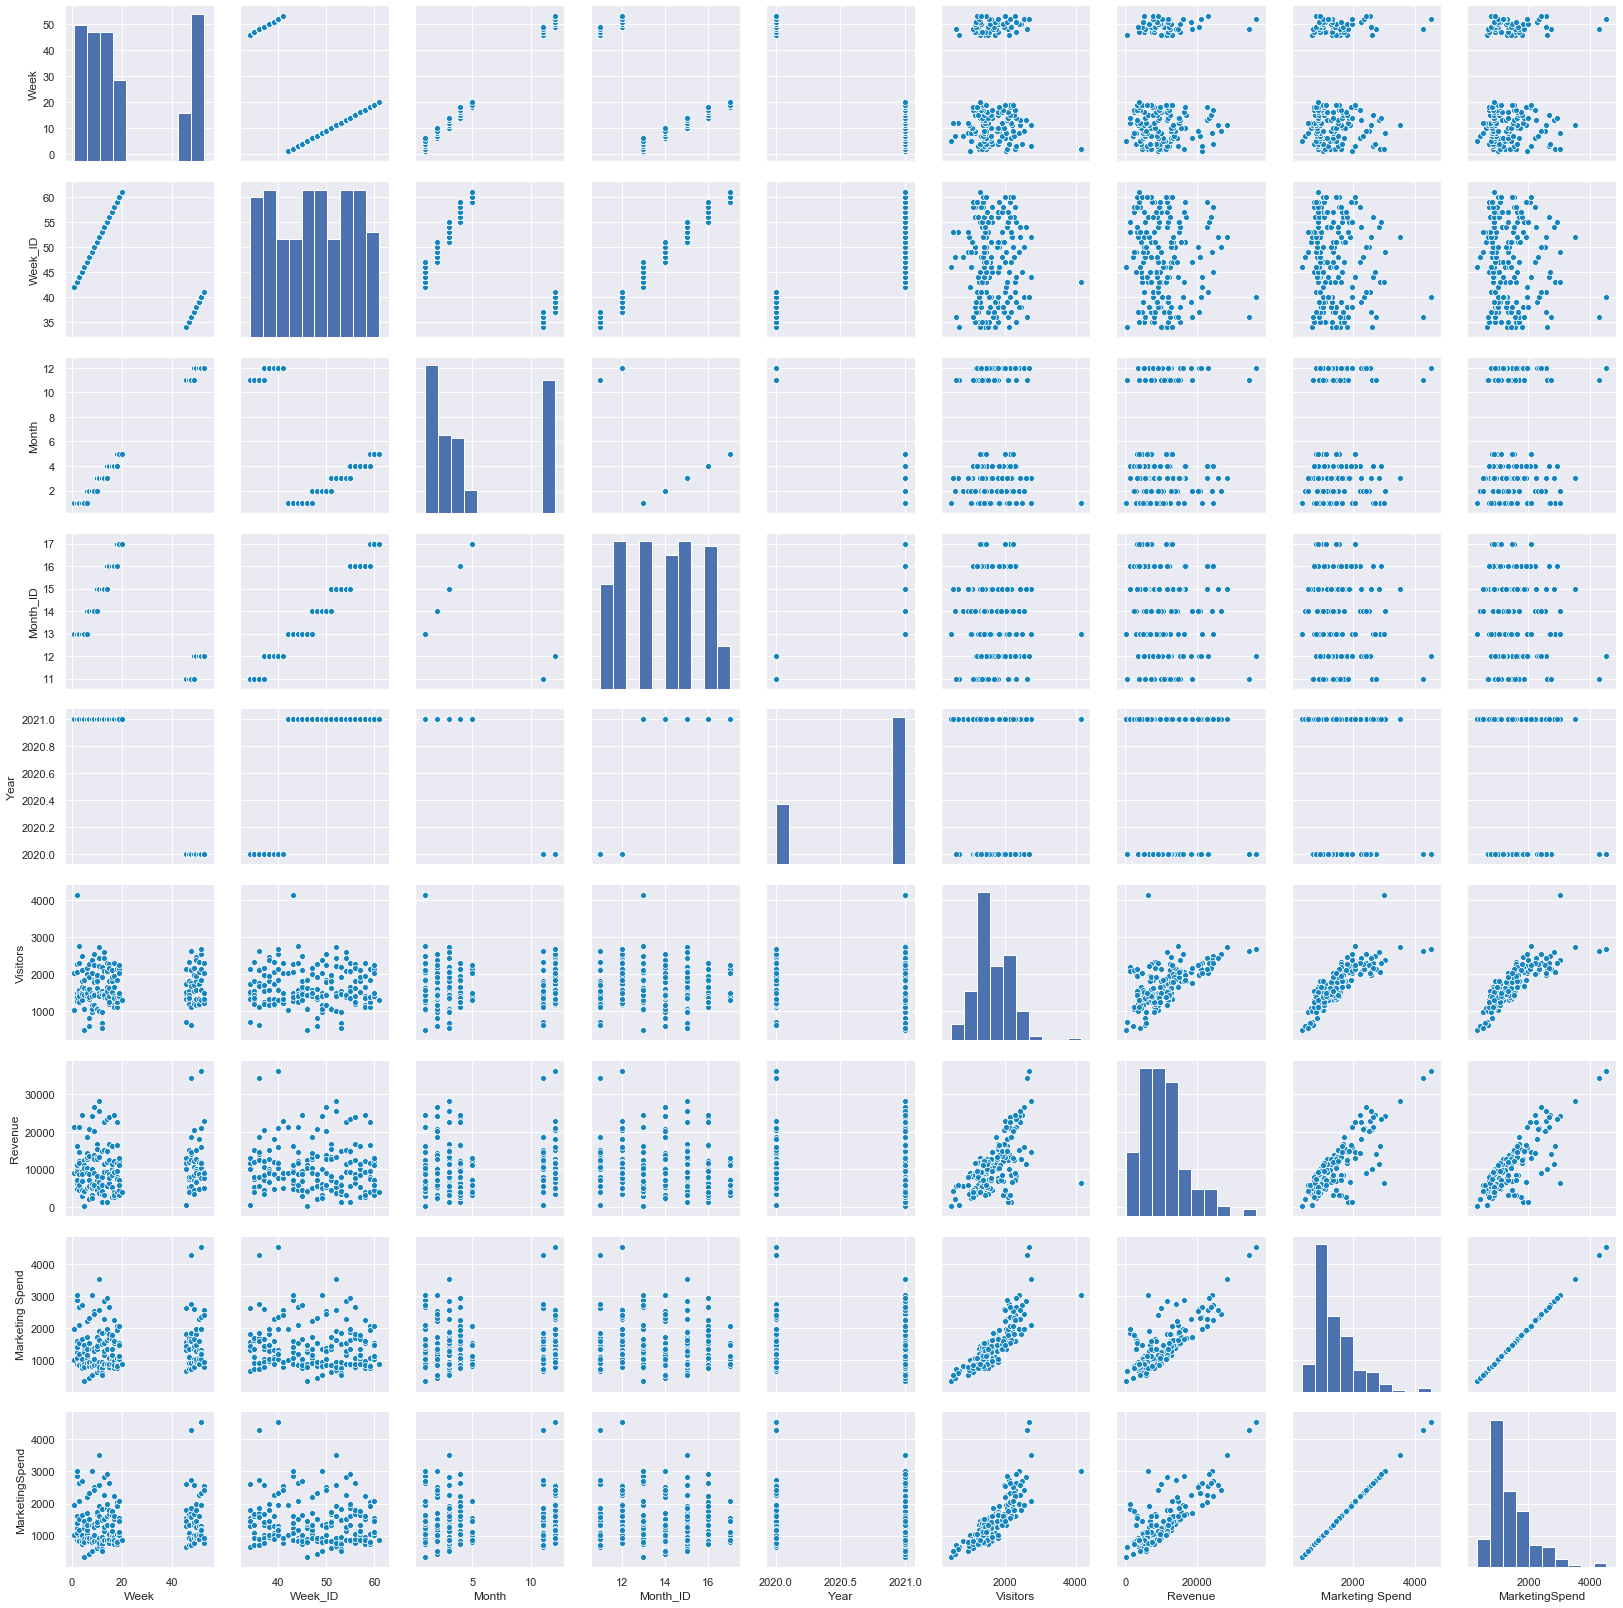

In [4]:
# Escanear como se relacionan las variables, por parejas
plt.figure(figsize=(7,7))
sb.pairplot(promo, plot_kws={'color':'#1684BF'})
"""La grafica muestra que las mejores relaciones lineales estan entre Visitors, Marketing Spend y Revenue"""

## Create a new dataframe only with the variables of interest:

In [5]:
cdf = promo[['Visitors','MarketingSpend','Revenue']]
cdf.describe()

,Visitors,MarketingSpend,Revenue
count,182.000000,182.000000,182.000000
mean,1666.730769,1396.356564,10581.593407
std,503.528049,691.867416,6297.626426
min,488.000000,322.000000,292.000000
25%,1339.000000,880.431250,5929.500000
50%,1546.000000,1223.900000,9452.000000
75%,2027.500000,1676.450000,12959.500000
max,4139.000000,4535.375000,36283.000000


Text(0, 0.5, 'Marketing Spend')

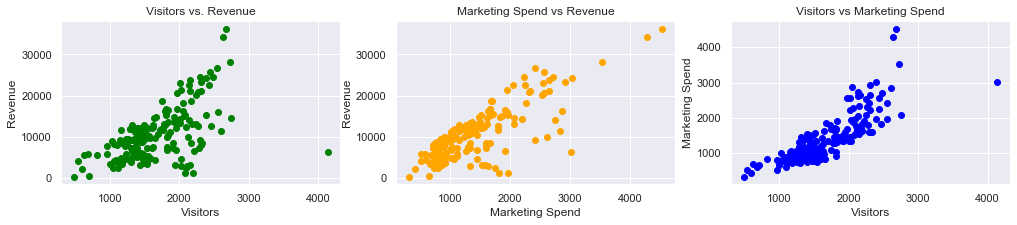

In [6]:
#### El siguiente paso es obtener scatterplots y correlaciones entre estas tres variables
fig, (axs) =  plt.subplots(nrows=1, ncols=3, sharex=False, sharey=False, squeeze=False, figsize=(17,3))
axs[0][0].scatter(cdf.Visitors,cdf.Revenue, color = 'green')
axs[0][1].scatter(cdf.MarketingSpend,cdf.Revenue, color = 'orange')
axs[0][2].scatter(cdf.Visitors,cdf.MarketingSpend, color = 'blue')
axs[0][0].set_title('Visitors vs. Revenue')
axs[0][0].set_xlabel('Visitors')
axs[0][0].set_ylabel('Revenue')
axs[0][1].set_title('Marketing Spend vs Revenue')
axs[0][1].set_xlabel('Marketing Spend')
axs[0][1].set_ylabel('Revenue')
axs[0][2].set_title('Visitors vs Marketing Spend')
axs[0][2].set_xlabel('Visitors')
axs[0][2].set_ylabel('Marketing Spend')

                 Visitors  Marketing Spend   Revenue
Visitors          1.00000          0.82481  0.573842
Marketing Spend   0.82481          1.00000  0.790425


'The color plot shows correlation data. The best value is for Visitors with Marketing Spend'

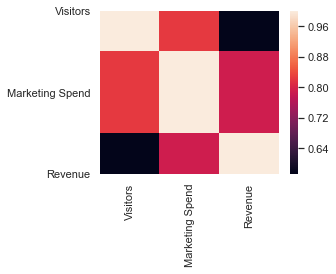

In [7]:
# Sacar la correlacion entre todos las variables de interes
sb.set(rc={'figure.figsize':(8,8)})
cor = promo[['Visitors', 'Marketing Spend', 'Revenue']].corr()
print(cor.head(2)) # La columna tres es repeticion, no necesita imprimirse.
plt.figure(figsize=(4,3))
sb.heatmap(cor)
"""The color plot shows correlation data. The best value is for Visitors with Marketing Spend"""

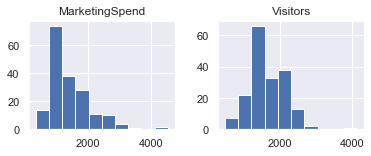

"The histograms show that the Visitors data is slightly more compact than the Marketing Spend data,\nbut I don't think there is a significative diference"

In [8]:
fig = cdf[['MarketingSpend','Visitors']]
fig.hist(figsize=(6,2))
plt.show()
"""The histograms show that the Visitors data is slightly more compact than the Marketing Spend data,
but I don't think there is a significative diference"""

## Test the linear regression model:

For this the data must be trained.
Use between 70 and 80% of the data for training and the rest for testing without having been trained.

<img src = "TrainTest.png" style = "width:300px;height:150px/">

#### I am interested in the effect of Marketing Data on the Revenue. So, I will test the model with these variables

In [9]:
msk = np.random.rand(len(promo)) < 0.8 # 80% of entire data for training and 20% for testing
train1 = cdf[msk]
test1 = cdf[~msk]

## Train the model

In [10]:
regr = linear_model.LinearRegression()
train1_x = np.asanyarray(train1[['MarketingSpend']])
train1_y = np.asanyarray(train1[['Revenue']])
regr.fit(train1_x, train1_y)
#cor1_1 = train1[['MarketingSpend', 'Revenue']].corr() # 0.81
print ('Coefficients: ', regr.coef_) # This is equivalent to the slope
print ('Intercept: ', regr.intercept_)
print("Model Score: %.2f" % regr.score(train1_x, train1_y))

Coefficients:  [[7.52523659]]
Intercept:  [250.10974702]
Model Score: 0.67


## Test the model

In [11]:
test1_x = np.asanyarray(test1[['MarketingSpend']])
test1_y = np.asanyarray(test1[['Revenue']])
test1_y_hat = regr.predict(test1_x)
#cor1_1 = test1[['MarketingSpend', 'Revenue']].corr() # 0.71
print("Mean absolute error: %.2f" % np.mean(np.absolute(test1_y_hat - test1_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test1_y_hat - test1_y) ** 2))
print("R2-score: %.2f" % r2_score(test1_y_hat , test1_y))
print("Model Score: %.2f" % regr.score(test1_x, test1_y))

Mean absolute error: 2963.40
Residual sum of squares (MSE): 19787481.27
R2-score: -0.13
Model Score: 0.07


Text(0.5, 0, 'Marketing Spend')

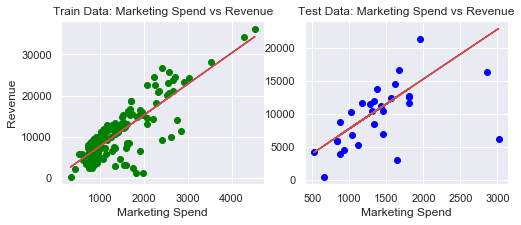

In [12]:
fig, (axs) =  plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, squeeze=False, figsize=(8,3))
axs[0][0].scatter(train1.MarketingSpend, train1.Revenue, color='green')
axs[0][0].plot(train1_x, regr.coef_[0][0]*train1_x + regr.intercept_[0], '-r') # (x, y-hat)
axs[0][1].scatter(test1.MarketingSpend, test1.Revenue, color='blue')
axs[0][1].plot(test1_x, regr.coef_[0][0]*test1_x + regr.intercept_[0], '-r') # (x, y-hat)
axs[0][0].set_title('Train Data: Marketing Spend vs Revenue')
axs[0][0].set_xlabel('Marketing Spend')
axs[0][0].set_ylabel('Revenue')
axs[0][1].set_title('Test Data: Marketing Spend vs Revenue')
axs[0][1].set_xlabel('Marketing Spend')

### Revisar la correlacion lineal entre Visitors y Marketing Spend

In [13]:
msk = np.random.rand(len(cdf)) < 0.85 # 80% of cdf data for training and 20% for testing
train2 = cdf[msk]
test2 = cdf[~msk]

In [14]:
regr = linear_model.LinearRegression()
train2_x = np.asanyarray(train2[['Visitors']])
train2_y = np.asanyarray(train2[['MarketingSpend']])
regr.fit(train2_x, train2_y)

print ('Coefficients: ', regr.coef_) # Equivale al slope
print ('Intercept: ', regr.intercept_)
print("Model Score: %.2f" % regr.score(train2_x, train2_y))

Coefficients:  [[1.05640636]]
Intercept:  [-396.00737386]
Model Score: 0.67


In [15]:
test2_x = np.asanyarray(test2[['Visitors']])
test2_y = np.asanyarray(test2[['MarketingSpend']])
test2_y_hat = regr.predict(test2_x)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test2_y_hat - test2_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test2_y_hat - test2_y) ** 2))
print("R2-score: %.2f" % r2_score(test2_y_hat , test2_y))
print("Model Score: %.2f" % regr.score(test2_x, test2_y))

Mean absolute error: 355.10
Residual sum of squares (MSE): 269142.02
R2-score: 0.23
Model Score: 0.68


Text(0.5, 0, 'Visitors')

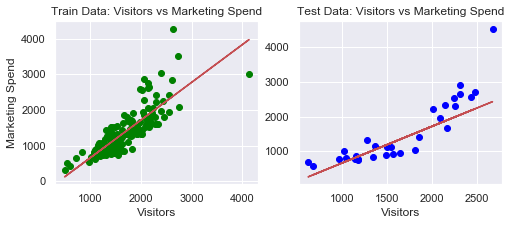

In [16]:
fig, (axs) =  plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, squeeze=False, figsize=(8,3))
axs[0][0].scatter(train2.Visitors, train2.MarketingSpend, color='green')
axs[0][0].plot(train2_x, regr.coef_[0][0]*train2_x + regr.intercept_[0], '-r')
axs[0][1].scatter(test2.Visitors, test2.MarketingSpend, color='blue')
axs[0][1].plot(test2_x, regr.coef_[0][0]*test2_x + regr.intercept_[0], '-r')
axs[0][0].set_title('Train Data: Visitors vs Marketing Spend')
axs[0][0].set_xlabel('Visitors')
axs[0][0].set_ylabel('Marketing Spend')
axs[0][1].set_title('Test Data: Visitors vs Marketing Spend')
axs[0][1].set_xlabel('Visitors')

#### _El modelo de regresion lineal no se ajusta bien_

## Test the relationship in other dataset: Cleaned Marketing Data

In [18]:
market = pd.read_csv('DatasetsML/MarketingData-CleanedMergedData1.csv')

In [19]:
market.shape

(185950, 13)

In [20]:
marketing = market.groupby("Product").agg({"Quantity Ordered":"sum","Sales":"sum","Price Each":"max"})
marketing.shape

(19, 3)

In [21]:
marketing.describe()

,Quantity Ordered,Sales,Price Each
count,19.000000,1.900000e+01,19.000000
mean,11004.157895,1.815370e+06,380.297895
std,9673.951745,2.064375e+06,429.869997
min,646.000000,9.274083e+04,2.990000
25%,4429.000000,3.673471e+05,57.470000
50%,6244.000000,1.132424e+06,300.000000
75%,18109.000000,2.395328e+06,600.000000
max,31017.000000,8.037600e+06,1700.000000


Text(0, 0.5, 'Quantity Ordered')

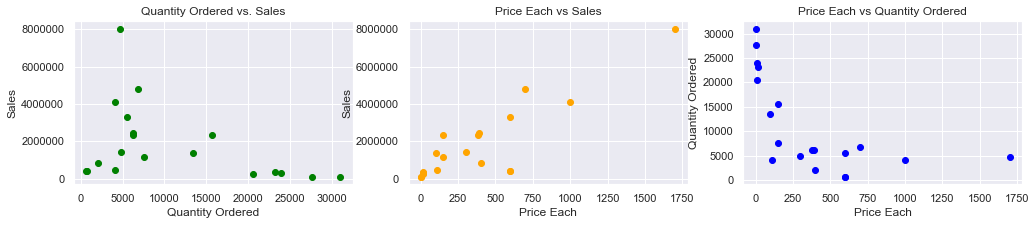

In [22]:
# Sacar los scatterplot para las variables de interes
fig, (axs) =  plt.subplots(nrows=1, ncols=3, sharex=False, sharey=False, squeeze=False, figsize=(17,3))
axs[0][0].scatter(marketing['Quantity Ordered'],marketing.Sales, color = 'green')
axs[0][1].scatter(marketing['Price Each'],marketing.Sales, color = 'orange')
axs[0][2].scatter(marketing['Price Each'],marketing['Quantity Ordered'], color = 'blue')
axs[0][0].set_title('Quantity Ordered vs. Sales')
axs[0][0].set_xlabel('Quantity Ordered')
axs[0][0].set_ylabel('Sales')
axs[0][1].set_title('Price Each vs Sales')
axs[0][1].set_xlabel('Price Each')
axs[0][1].set_ylabel('Sales')
axs[0][2].set_title('Price Each vs Quantity Ordered')
axs[0][2].set_xlabel('Price Each')
axs[0][2].set_ylabel('Quantity Ordered')

In [23]:
# Sacar la correlacion entre todos las variables de interes
sb.set(rc={'figure.figsize':(8,8)})
cor = marketing[['Price Each', 'Quantity Ordered', 'Sales']].corr()
cor.head(2)

,Price Each,Quantity Ordered,Sales
Price Each,1.000000,-0.601443,0.865484
Quantity Ordered,-0.601443,1.000000,-0.398287


'It seems that the price of each item is linearly related to the amount of Sales of the item'

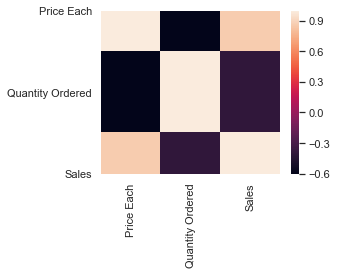

In [24]:
plt.figure(figsize=(4,3))
sb.heatmap(cor)
"""It seems that the price of each item is linearly related to the amount of Sales of the item"""

## Test linear regression between Price of each item and the amount of sales

In [25]:
msk = np.random.rand(len(marketing)) < 0.8 # 80% of entire data for training and 20% for testing
train3 = marketing[msk]
test3 = marketing[~msk]

In [26]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train3_x = np.asanyarray(train3[['Price Each']])
train3_y = np.asanyarray(train3[['Sales']])
regr.fit(train3_x, train3_y)
# The coefficient 'r or Pearson correlation coefficient' is a measure of the degree of (linear) association.
print ('Coefficient: ', regr.coef_) # This is equivalent to the slope 'm' in the line equation. 
print ('Intercept: ', regr.intercept_)

Coefficient:  [[3563.28350729]]
Intercept:  [248542.07871284]


Text(0, 0.5, 'Sales')

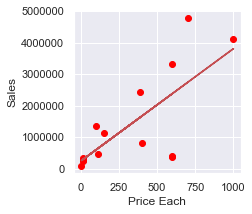

In [27]:
plt.figure(figsize=(3,3))
plt.scatter(train3['Price Each'], train3.Sales, color='red')
plt.plot(train3_x, regr.coef_[0][0]*train3_x + regr.intercept_[0], '-r')
plt.xlabel("Price Each")
plt.ylabel("Sales")

In [28]:
from sklearn.metrics import r2_score
test3_x = np.asanyarray(test3[['Price Each']])
test3_y = np.asanyarray(test3[['Sales']])
test3_y_hat = regr.predict(test3_x)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test3_y_hat - test3_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test3_y_hat - test3_y) ** 2))
print("R2-score: %.2f" % r2_score(test3_y_hat , test3_y)) # Measures the strenght of association
print("Model Score: %.2f" % regr.score(test3_x, test3_y))

Mean absolute error: 866974.95
Residual sum of squares (MSE): 1211707755904.39
R2-score: 0.74
Model Score: 0.84
